# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Filtering Data 

In [2]:
df = pd.read_csv("/kaggle/input/housedata/data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
df = df[["price" , "bedrooms" , "bathrooms", "sqft_living" , "sqft_above"]]
df

,price,bedrooms,bathrooms,sqft_living,sqft_above
0,3.130000e+05,3.0,1.50,1340,1340
1,2.384000e+06,5.0,2.50,3650,3370
2,3.420000e+05,3.0,2.00,1930,1930
3,4.200000e+05,3.0,2.25,2000,1000
4,5.500000e+05,4.0,2.50,1940,1140
...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,1510
4596,5.343333e+05,3.0,2.50,1460,1460
4597,4.169042e+05,3.0,2.50,3010,3010
4598,2.034000e+05,4.0,2.00,2090,1070


In [4]:
pd.options.display.float_format = '{:,.2f}'.format
df

,price,bedrooms,bathrooms,sqft_living,sqft_above
0,"313,000.00",3.00,1.50,1340,1340
1,"2,384,000.00",5.00,2.50,3650,3370
2,"342,000.00",3.00,2.00,1930,1930
3,"420,000.00",3.00,2.25,2000,1000
4,"550,000.00",4.00,2.50,1940,1140
...,...,...,...,...,...
4595,"308,166.67",3.00,1.75,1510,1510
4596,"534,333.33",3.00,2.50,1460,1460
4597,"416,904.17",3.00,2.50,3010,3010
4598,"203,400.00",4.00,2.00,2090,1070


In [5]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_above     0
dtype: int64

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_above
count,"4,600.00","4,600.00","4,600.00","4,600.00","4,600.00"
mean,"551,962.99",3.40,2.16,"2,139.35","1,827.27"
std,"563,834.70",0.91,0.78,963.21,862.17
min,0.00,0.00,0.00,370.00,370.00
25%,"322,875.00",3.00,1.75,"1,460.00","1,190.00"
50%,"460,943.46",3.00,2.25,"1,980.00","1,590.00"
75%,"654,962.50",4.00,2.50,"2,620.00","2,300.00"
max,"26,590,000.00",9.00,8.00,"13,540.00","9,410.00"


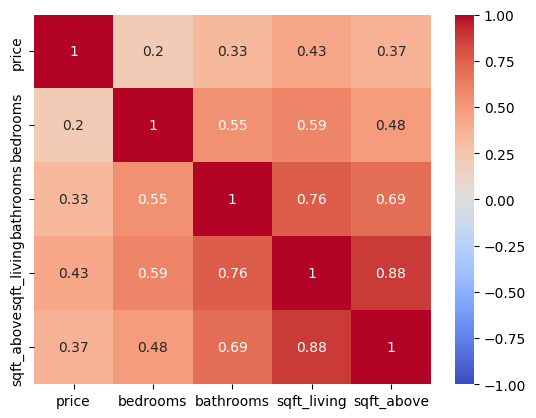

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm" ,  annot=True, vmin=-1, vmax=1)
plt.show()

# Detecting and removing outliers

<Axes: >

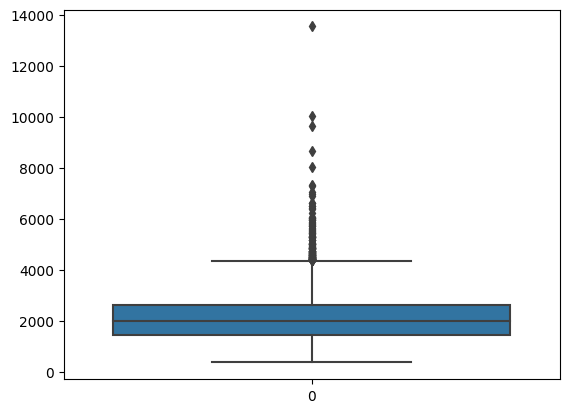

In [8]:
sns.boxplot(df.sqft_living)

<Axes: >

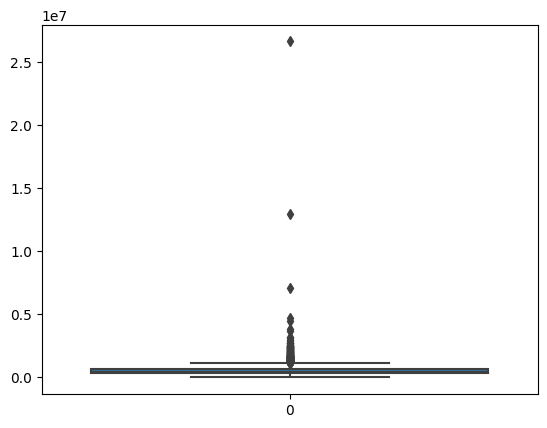

In [9]:
sns.boxplot(df.price)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

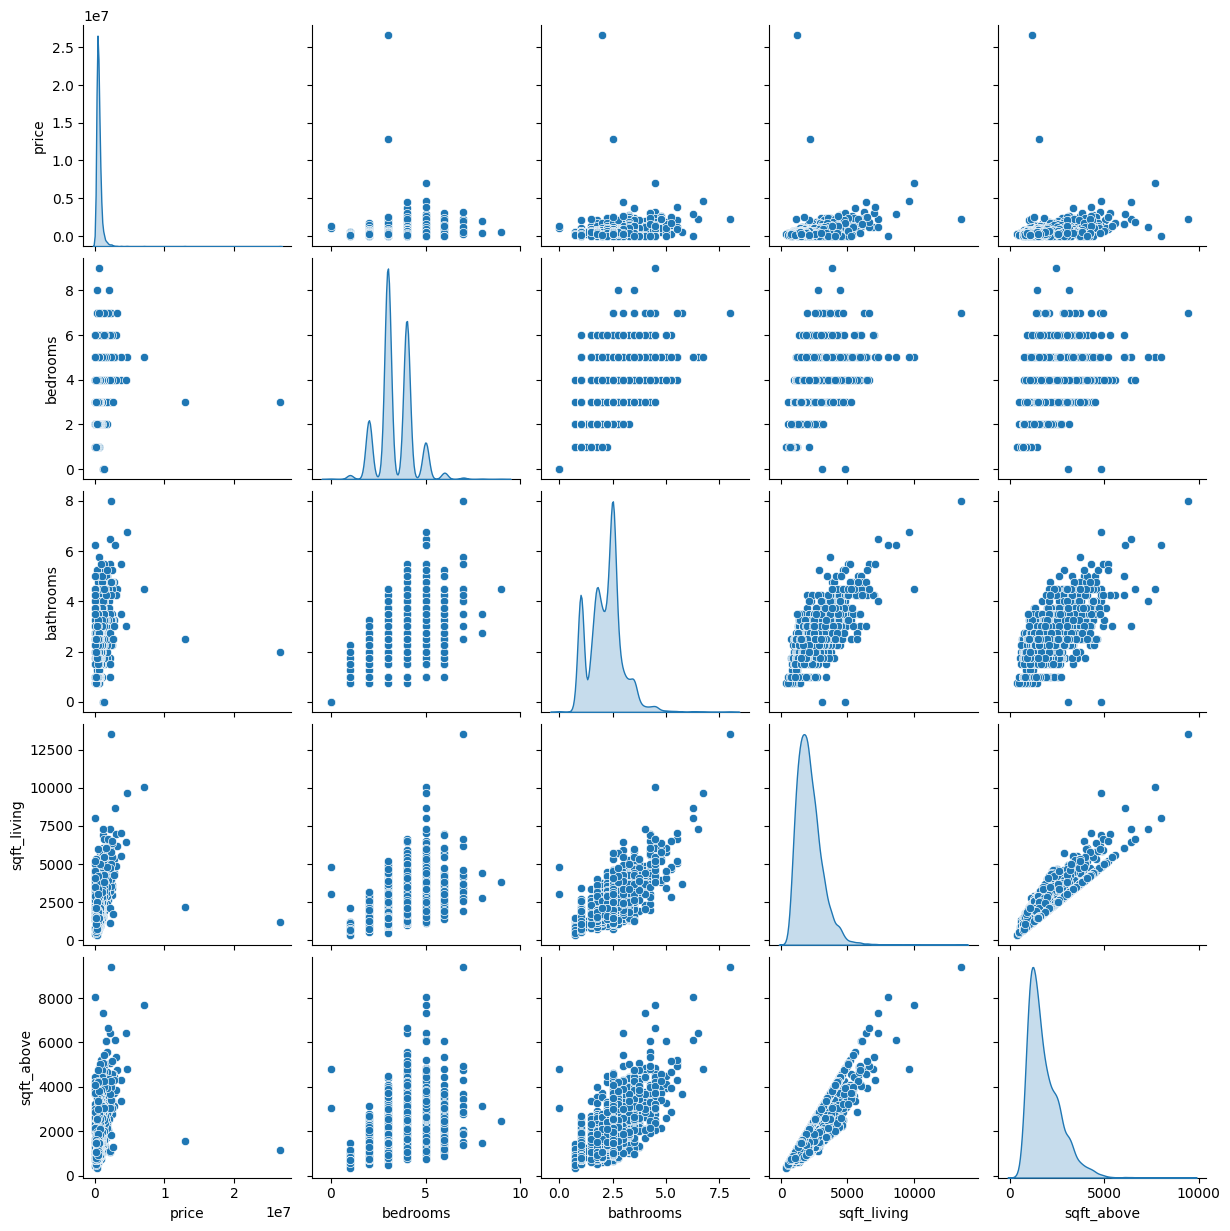

In [10]:
sns.pairplot(data=df, diag_kind='kde')

In [11]:
upper_l1 = df.price.mean() + 3*df.price.std()
lower_l1 = df.price.mean() - 3*df.price.std()
upper_l2 = df.sqft_living.mean() + 3*df.sqft_living.std()
lower_l2 = df.sqft_living.mean() - 3*df.sqft_living.std()
df = df.loc[(df.price >= lower_l1) & (df.price <= upper_l1) & (df.sqft_living >= lower_l2) & (df.sqft_living <= upper_l2)]

In [12]:
q1 = df["sqft_living"].quantile(0.25)
q3 = df["sqft_living"].quantile(0.75)
q1_A = df["price"].quantile(0.25)
q3_A = df["price"].quantile(0.75)
intr = q3-q1
intr_A = q3_A - q1_A
upper_limit_A =  q3_A+ (1.5*intr_A)
lower_limit_A = q1_A- (1.5 * intr_A)
upper_limit_Gr =  q3+ (1.5*intr)
lower_limit_Gr = q1- (1.5 * intr)
newdf = df[(df.sqft_living >= lower_limit_Gr) & (df.sqft_living <= upper_limit_Gr) & (df.price <= upper_limit_A) & (df.price >= lower_limit_A)]

In [13]:
upper_l1 = newdf.price.mean() + 3*newdf.price.std()
lower_l1 = newdf.price.mean() - 3*newdf.price.std()
upper_l2 = newdf.sqft_living.mean() + 3*newdf.sqft_living.std()
lower_l2 = newdf.sqft_living.mean() - 3*newdf.sqft_living.std()
newdf = newdf.loc[(newdf.price >= lower_l1) & (newdf.price <= upper_l1) & (newdf.sqft_living >= lower_l2) & (newdf.sqft_living <= upper_l2)]

In [14]:
newdf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_above
count,"4,277.00","4,277.00","4,277.00","4,277.00","4,277.00"
mean,"474,714.30",3.34,2.08,"1,992.24","1,716.22"
std,"211,622.38",0.88,0.70,744.07,716.96
min,0.00,0.00,0.00,370.00,370.00
25%,"313,000.00",3.00,1.75,"1,430.00","1,170.00"
50%,"441,000.00",3.00,2.25,"1,900.00","1,520.00"
75%,"602,000.00",4.00,2.50,"2,480.00","2,150.00"
max,"1,115,000.00",9.00,5.75,"4,240.00","4,230.00"


<Axes: >

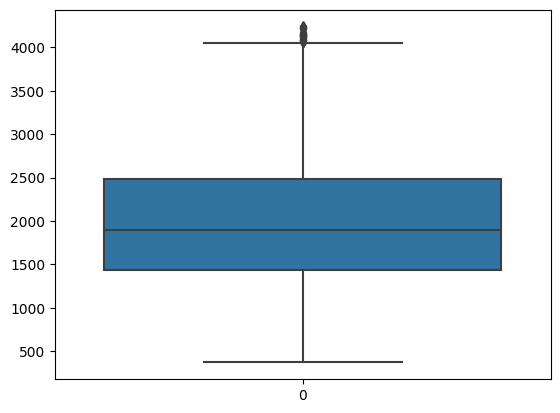

In [15]:
sns.boxplot(newdf.sqft_living)

<Axes: >

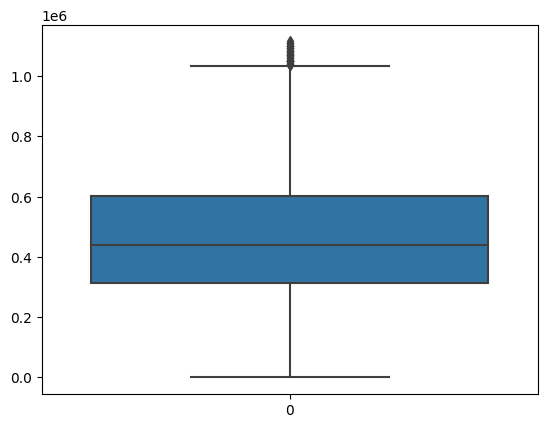

In [16]:
sns.boxplot(newdf.price)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

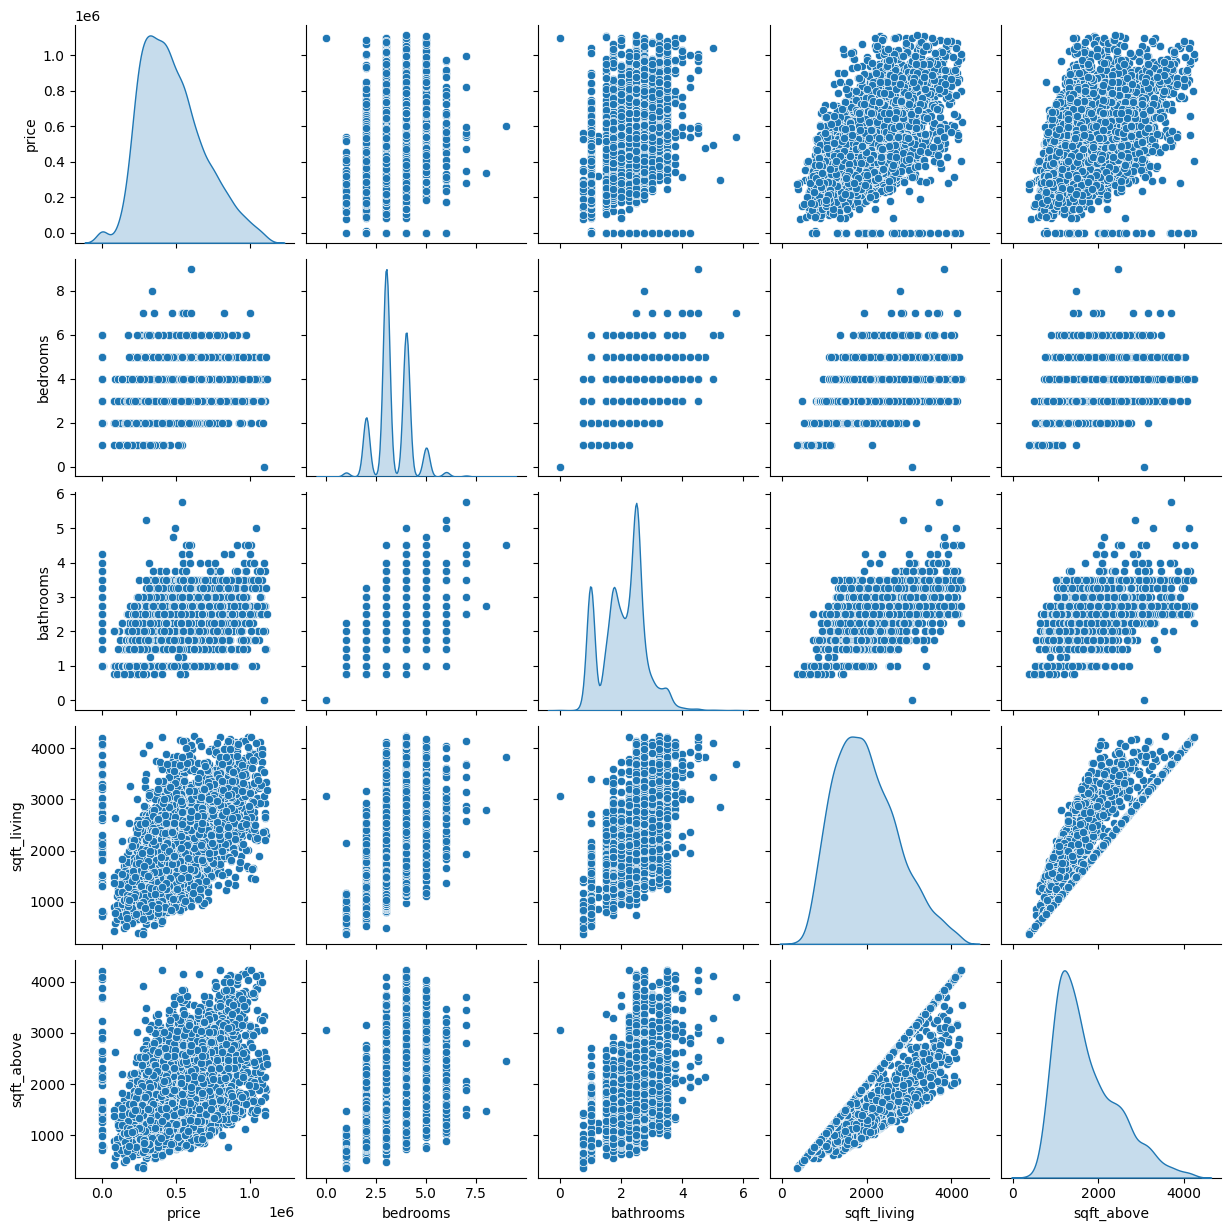

In [17]:
sns.pairplot(data=newdf, diag_kind='kde')

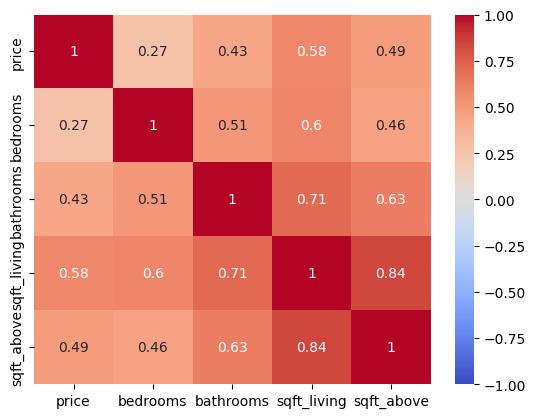

In [18]:
correlation_matrix = newdf.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm" ,  annot=True, vmin=-1, vmax=1)
plt.show()

# EDA

In [19]:
newdf

,price,bedrooms,bathrooms,sqft_living,sqft_above
0,"313,000.00",3.00,1.50,1340,1340
2,"342,000.00",3.00,2.00,1930,1930
3,"420,000.00",3.00,2.25,2000,1000
4,"550,000.00",4.00,2.50,1940,1140
5,"490,000.00",2.00,1.00,880,880
...,...,...,...,...,...
4595,"308,166.67",3.00,1.75,1510,1510
4596,"534,333.33",3.00,2.50,1460,1460
4597,"416,904.17",3.00,2.50,3010,3010
4598,"203,400.00",4.00,2.00,2090,1070


In [20]:
len(newdf.bedrooms.value_counts())

10

In [21]:
bedrooms = newdf['bedrooms'].value_counts()
other_sum = bedrooms.iloc[5:].sum()
bedrooms = pd.concat([bedrooms.iloc[:5], pd.Series([other_sum], index=['Others'])])
fig = px.pie(
    names=bedrooms.index,
    values=bedrooms.values,
    template='plotly_dark',
)

fig.update_layout(
    legend_title_text='Number of Bedrooms',
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

The majority of houses have 3 bedrooms

In [22]:
len(newdf.bathrooms.value_counts())

21

In [23]:
bathrooms = newdf['bathrooms'].value_counts()
other_sum = bathrooms.iloc[10:].sum()
bathrooms = pd.concat([bathrooms.iloc[:10], pd.Series([other_sum], index=['Others'])])
fig = px.pie(
    names=bathrooms.index,
    values=bathrooms.values,
    template='plotly_dark',
)

fig.update_layout(
    legend_title_text='Number of Bathrooms',
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

the majority of houses have 2.5 bathrooms(maybe one 2 full bathrooms and 1 half bathroom)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



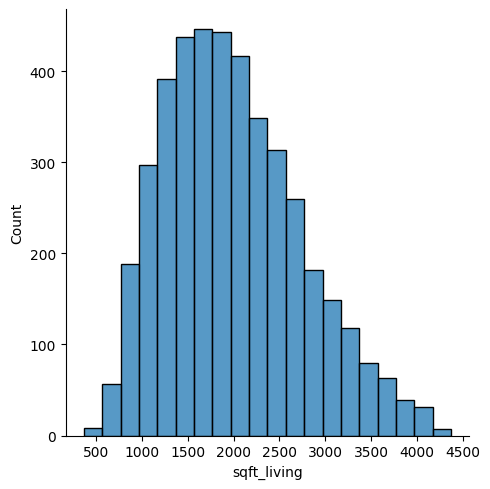

In [24]:
sns.displot(newdf, x="sqft_living", binwidth=200)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



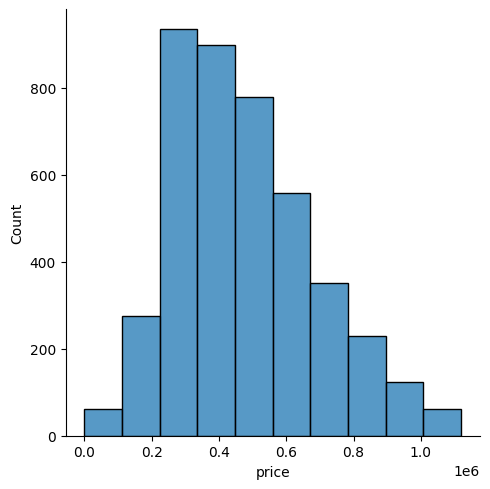

In [25]:
sns.displot(newdf, x="price", binwidth=112000)

<Axes: ylabel='Density'>

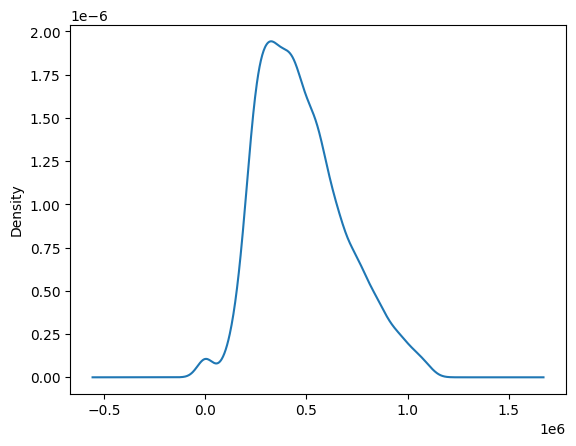

In [26]:
newdf.price.plot.kde()

# Date preprocessing and trainning model

In [27]:
x = df.drop("price" , axis = "columns")
y  =df.price

In [28]:
s = StandardScaler()
x = s.fit_transform(x)
y = s.fit_transform(y.values.reshape(-1,1))
Pf = PolynomialFeatures(degree=2)

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.15  , random_state = 5)
xe = Pf.fit_transform(x_train)
xp = Pf.fit_transform(x_test)

In [30]:
model = LinearRegression()

In [31]:
model.fit(xe ,y_train)

LinearRegression()

In [32]:
y_pred = model.predict(xp)

In [33]:
model.score(xe , y_train)

0.4377236303200899

In [34]:
print(mean_squared_error(y_test , y_pred) * 100)

69.63470222742374


In [35]:
print(r2_score(y_test , y_pred)*100)

35.48706243297136
